In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# https://rfriend.tistory.com/671

In [2]:
file_path = '../data/outputs/자양동614-25.csv'
df = pd.read_csv(file_path, 
                 parse_dates=['date'], 
                 index_col='date',
                header=0)
                 
df.head(12)

,risk
date,
1975-01-01,0.055960
1975-04-01,0.097307
1975-07-01,0.097307
1975-10-01,0.097307
1976-01-01,0.097307
1976-04-01,0.129742
1976-07-01,0.129742
1976-10-01,0.129742
1977-01-01,0.129742


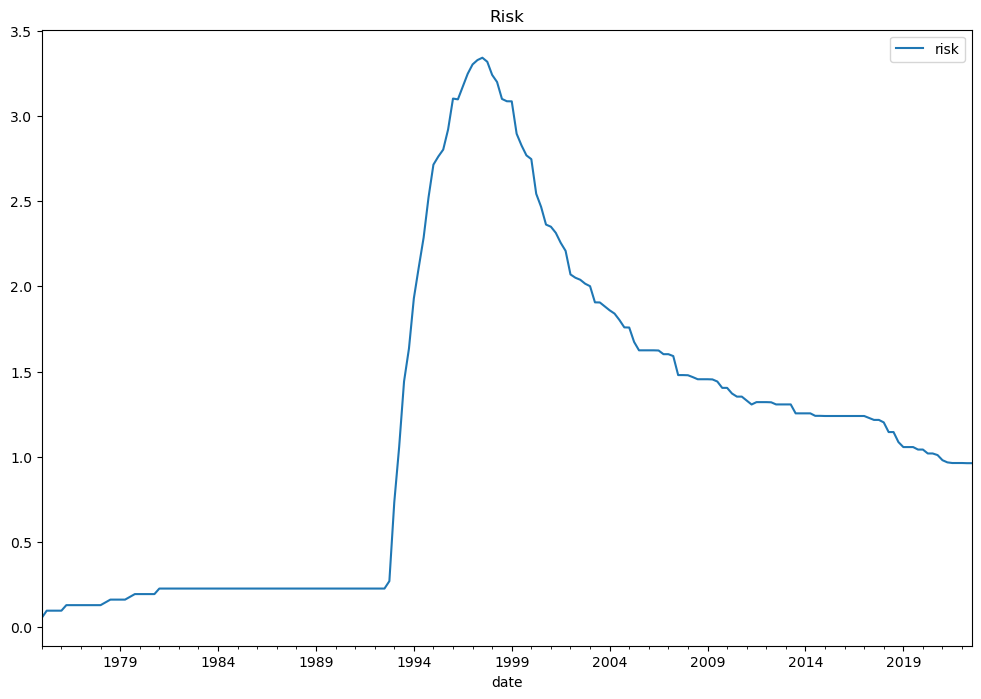

In [3]:
df.plot(figsize=[12,8])
plt.title("Risk")
plt.show()

In [4]:
df_train = df.iloc[:171]
df_test = df.iloc[171:]

In [5]:
len(df_test)

20

In [6]:
## exponential smoothing in Python
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(df_train, 
                          initialization_method="estimated").fit()

# Trend
fit2 = Holt(df_train, 
            initialization_method="estimated").fit()

# Exponential trend
fit3 = Holt(df_train,
            exponential=True, 
            initialization_method="estimated").fit()

# Additive damped trend
fit4 = Holt(df_train,
            damped_trend=True, 
            initialization_method="estimated").fit()

# Multiplicative damped trend
fit5 = Holt(df_train,
            exponential=True, 
            damped_trend=True, 
            initialization_method="estimated").fit()

C:\Users\songkyu\anaconda3\envs\ITConsulting\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\songkyu\anaconda3\envs\ITConsulting\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\songkyu\anaconda3\envs\ITConsulting\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\songkyu\anaconda3\envs\ITConsulting\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\songkyu\anaconda3\envs\ITConsulting\lib\site-packages\statsmodels\tsa\b

In [7]:
print(fit1.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                   risk   No. Observations:                  171
Model:             SimpleExpSmoothing   SSE                              1.012
Optimized:                       True   AIC                           -873.138
Trend:                           None   BIC                           -866.854
Seasonal:                        None   AICC                          -872.897
Seasonal Periods:                None   Date:                 Wed, 03 May 2023
Box-Cox:                        False   Time:                         12:49:24
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
initial_level              0.0559598                

In [8]:
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'initial_level', 'initial_trend']
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","SSE"],
                     columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])

results["SES"] =            [fit1.params[p] for p in params] + [fit1.sse]
results["Holt's"] =         [fit2.params[p] for p in params] + [fit2.sse]
results["Exponential"] =    [fit3.params[p] for p in params] + [fit3.sse]
results["Additive"] =       [fit4.params[p] for p in params] + [fit4.sse]
results["Multiplicative"] = [fit5.params[p] for p in params] + [fit5.sse]

In [9]:
## Holt's Winters's method for time series data with Seasonality
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

# additive model for fixed seasonal variation
fit6 = HWES(df_train, 
             seasonal_periods=24, 
             trend='add', 
             seasonal='add').fit(optimized=True, use_brute=True)

# multiplicative model for increasing seasonal variation
fit7 = HWES(df_train, 
             seasonal_periods=24, 
             trend='add', 
             seasonal='mul').fit(optimized=True, use_brute=True)

C:\Users\songkyu\anaconda3\envs\ITConsulting\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\songkyu\anaconda3\envs\ITConsulting\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [10]:
forecast_1 = fit1.forecast(20)
forecast_2 = fit2.forecast(20)
forecast_3 = fit3.forecast(20)
forecast_4 = fit4.forecast(20)
forecast_5 = fit5.forecast(20)
forecast_6 = fit6.forecast(20)
forecast_7 = fit7.forecast(20)

In [11]:
y_test = df_test['risk']

In [12]:
t_p = pd.DataFrame({'test': y_test, 
                    'f1': forecast_1, 
                    'f2': forecast_2, 
                    'f3': forecast_3, 
                    'f4': forecast_4, 
                    'f5': forecast_5, 
                    'f6': forecast_6, 
                    'f7': forecast_7})

In [13]:
## UDF for counting the number of parameters in model
def num_params(model):
    n_params = 0

    for p in list(model.params.values()):
        if isinstance(p, np.ndarray):
            n_params += len(p)
            #print(p)
        elif p in [np.nan, False, None]:
            pass
        elif np.isnan(float(p)):
            pass
        else:
            n_params += 1
            #print(p)
    
    return n_params

In [14]:
print(num_params(fit1)
,
num_params(fit7)
)

2 29


In [15]:
## number of observations in training set
T = df_train.shape[0]
print(T)

171


In [16]:
## evaluation metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE


In [17]:
# Mean Absolute Percentage Error
def SSE(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.sum((y_test - y_pred)**2)

def ME(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(y_test - y_pred)

def RMSE(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.sqrt(np.mean((y_test - y_pred)**2))   
    #return np.sqrt(MSE(y_test - y_pred))

def MPE(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean((y_test - y_pred) / y_test) * 100

def MAPE(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

def AIC(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    return T * np.log(sse/T) + 2*k

def SBC(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    return T * np.log(sse/T) + k * np.log(T)

def APC(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    return ((T+k)/(T-k)) * sse / T

def ADJ_R2(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sst = np.sum((y_test - np.mean(y_test))**2)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    r2 = 1 - sse/sst
    return 1 - ((T - 1)/(T - k)) * (1 - r2)
    

## Combining all metrics together
def eval_all(y_test, y_pred, T, model):
    sse = SSE(y_test, y_pred)
    mse = MSE(y_test, y_pred)
    rmse = RMSE(y_test, y_pred)
    me = ME(y_test, y_pred)
    mae = MAE(y_test, y_pred)
    mpe = MPE(y_test, y_pred)
    mape = MAPE(y_test, y_pred)
    aic = AIC(y_test, y_pred, T, model)
    sbc = SBC(y_test, y_pred, T, model)
    apc = APC(y_test, y_pred, T, model)
    adj_r2 = ADJ_R2(y_test, y_pred, T, model)
    
    return [sse, mse, rmse, me, mae, mpe, mape, aic, sbc, apc, adj_r2]

In [18]:
eval_all_df = pd.DataFrame(
    {'SES': eval_all(y_test, forecast_1, T, fit1), 
    "Holt's": eval_all(y_test, forecast_2, T, fit2), 
    'Exponential': eval_all(y_test, forecast_3, T, fit3), 
    'Trend_Add': eval_all(y_test, forecast_4, T, fit4), 
    'Trend_Mult': eval_all(y_test, forecast_5, T, fit5), 
    'Trend_Season_Add': eval_all(y_test, forecast_6, T, fit6), 
    'Trend_Season_Mult': eval_all(y_test, forecast_7, T, fit7)}
    , index=['SSE', 'MSE', 'RMSE', 'ME', 'MAE', 'MPE', 'MAPE', 'AIC', 'SBC', 'APC', 'Adj_R2'])

In [19]:
y_test.shape

(20,)

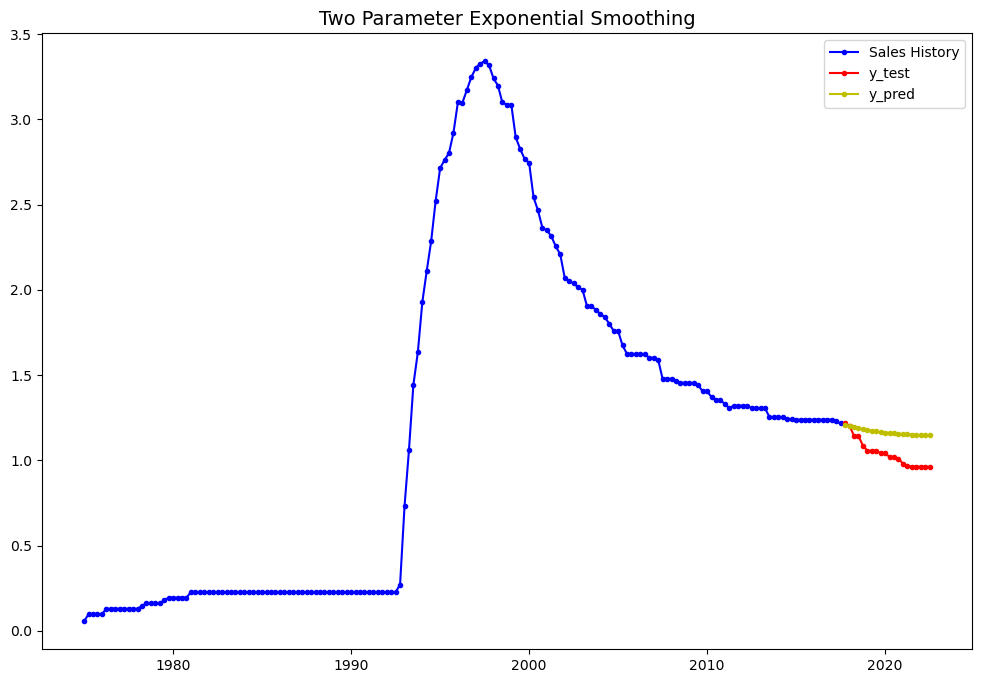

In [20]:
plt.rcParams['figure.figsize']=[12, 8]
past, = plt.plot(df_train.index, df_train, 'b.-', label='Sales History')
test, = plt.plot(df_test.index, df_test, 'r.-', label='y_test')
pred, = plt.plot(df_test.index, forecast_4, 'y.-', label='y_pred')
plt.title('Two Parameter Exponential Smoothing', fontsize=14)
plt.legend(handles=[past, test, pred])
plt.show()

forecast_2 (Trend) <br>
forecast_3 (Expotential Trend) <br>
forecast_7 (Multiplicative model for increasing seasonal variation)<br>
의 예측이 가장 정확

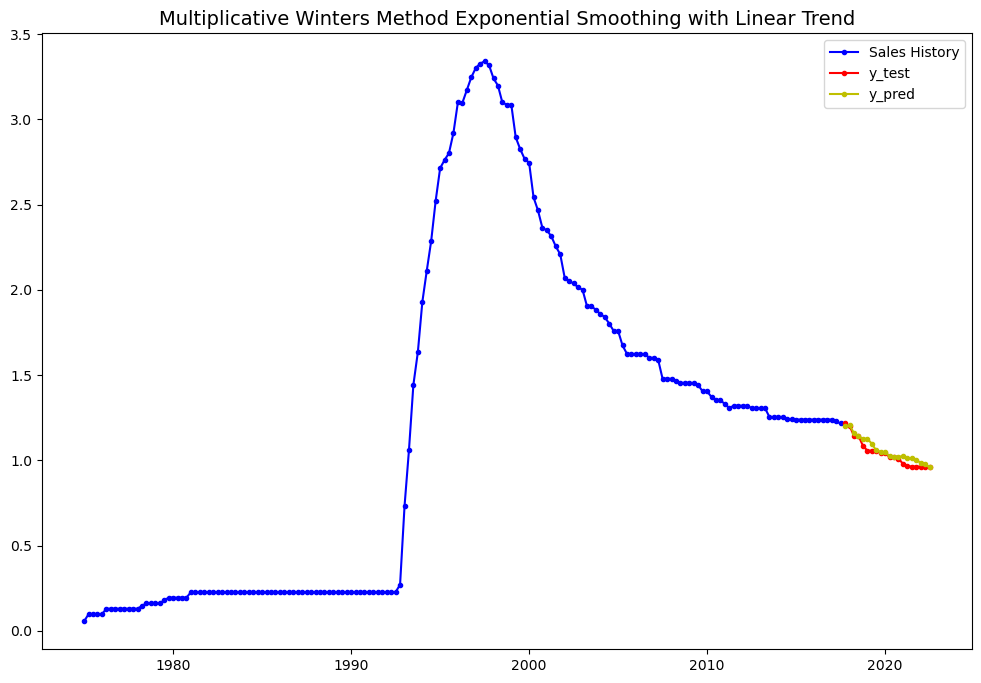

In [31]:
# 1차 선형 추세와 확산계절변동이 있는 승법 윈터스 지수평활법
plt.rcParams['figure.figsize']=[12, 8]
past, = plt.plot(df_train.index, df_train, 'b.-', label='Sales History')
test, = plt.plot(df_test.index, df_test, 'r.-', label='y_test')
pred, = plt.plot(df_test.index, forecast_7, 'y.-', label='y_pred')
plt.title('Multiplicative Winters Method Exponential Smoothing with Linear Trend', fontsize=14)
plt.legend(handles=[past, test, pred])
plt.show()

In [32]:
print(np.sum((y_test-forecast_7)**2))

0.017275079019702065


In [22]:
#print out the training summary
print(fit7.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                     risk   No. Observations:                  171
Model:             ExponentialSmoothing   SSE                              0.354
Optimized:                         True   AIC                          -1000.766
Trend:                         Additive   BIC                           -912.800
Seasonal:                Multiplicative   AICC                          -987.480
Seasonal Periods:                    24   Date:                 Wed, 03 May 2023
Box-Cox:                          False   Time:                         12:49:25
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               1.0000000                alpha                 True
smoothing_trend          

In [23]:
forecast_7

2017-10-01    1.198968
2018-01-01    1.205663
2018-04-01    1.160161
2018-07-01    1.140185
2018-10-01    1.126951
2019-01-01    1.126022
2019-04-01    1.098783
2019-07-01    1.058083
2019-10-01    1.051380
2020-01-01    1.046234
2020-04-01    1.024801
2020-07-01    1.021578
2020-10-01    1.022333
2021-01-01    1.023077
2021-04-01    1.012339
2021-07-01    1.011042
2021-10-01    1.001107
2022-01-01    0.986191
2022-04-01    0.977378
2022-07-01    0.958801
Freq: QS-OCT, dtype: float64